In [44]:
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

from glob import glob
import os

In [34]:
df_exp_100 = pd.read_csv('../../results/experiments/sim_costs_load=3482_pv=7989 6423_numsteps=100.csv', index_col=0)
df_exp_40 = pd.read_csv('../../results/experiments/sim_costs_load=3482_pv=7989 6423_numsteps=40.csv', index_col=0)
df_exp_6423_40 = pd.read_csv('../../results/experiments/sim_costs_load=6423_pv=7989 6423_numsteps=40.csv', index_col=0)
df_exp_cmp = pd.read_csv('../../results/experiments/sim_costs_load=3482_pv=7989 6423_cmp.csv', index_col=0)
df_exp_20 = pd.read_csv('../../results/experiments/sim_costs_load=3482_pv=7989 6423_numsteps=20.csv', index_col=0)
df_exp_6423_20 = pd.read_csv('../../results/experiments/sim_costs_load=6423_pv=7989 6423_numsteps=20.csv', index_col=0)

## Plots by Days_In_Chunk

In [3]:
def plot_by_daysinchunk(df):
    for (effective_epsilon, p), df_split in df.groupby(['effective_epsilon', 'p']):
        epsilon = df_split.iloc[-1]['epsilon']
        print(epsilon, p, effective_epsilon)

        fig, (ax_cost, ax_simcalled) = plt.subplots(1, 2, figsize=(14, 4))
        fig.suptitle(f'load_id={3842}, epsilon={epsilon}, p={p}, effective={effective_epsilon}')

        ax_cost.set_title('sizing cost vs. days_in_chunk')
        ax_cost.set_ylabel('cost ($)')
        ax_cost.set_xlabel('days_in_chunk')

        ax_simcalled.set_title('duration (s) vs. days_in_chunk')
        ax_simcalled.set_ylabel('duration (s)')
        ax_simcalled.set_xlabel('days_in_chunk')

        lgds = []
        for idx, ((sim_type, conf), df_conf) in enumerate(df_split.groupby(['sim_type', 'confidence'])):
            print(sim_type, conf, len(df_conf))
            ax_cost.scatter(df_conf['days_in_chunk'], df_conf['cost'])
            ax_simcalled.scatter(df_conf['days_in_chunk'], df_conf['duration'])
            lgds.append(f'{sim_type}, conf={conf}')

        plt.legend(lgds)
        plt.show()

0.1 0.9 0.19
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


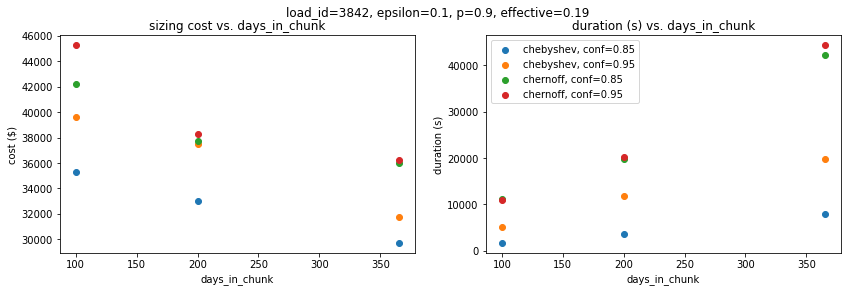

0.1 0.8 0.28
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


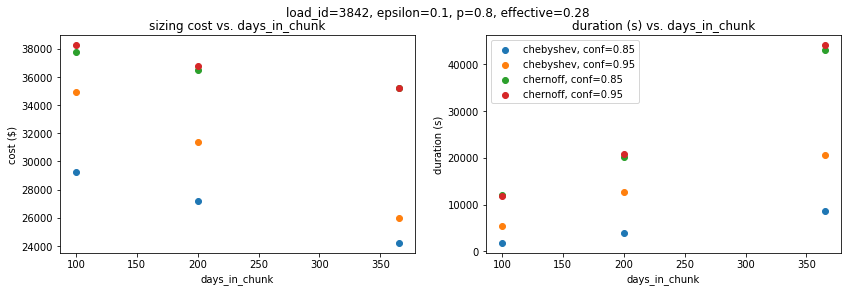

0.3 0.9 0.37
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


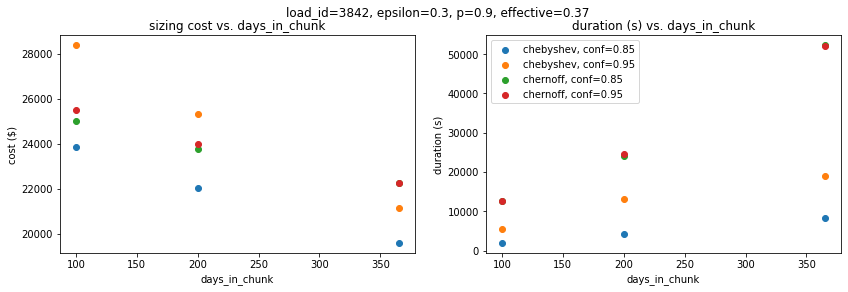

0.3 0.8 0.44
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


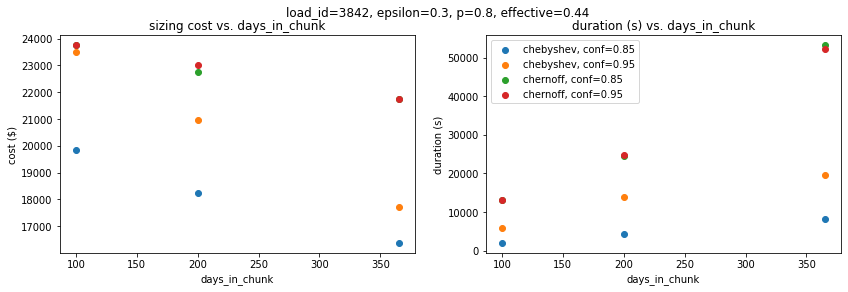

0.1 0.5 0.55
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


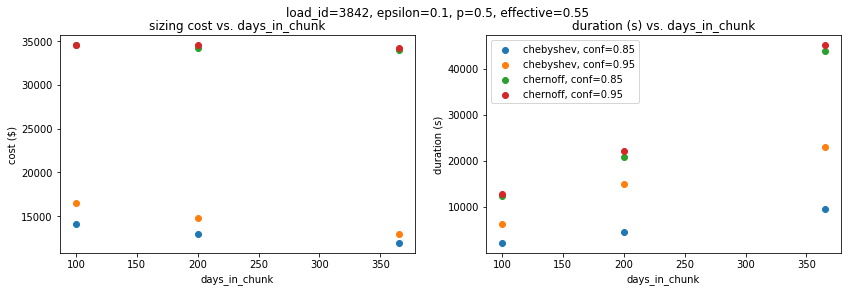

0.3 0.5 0.65
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


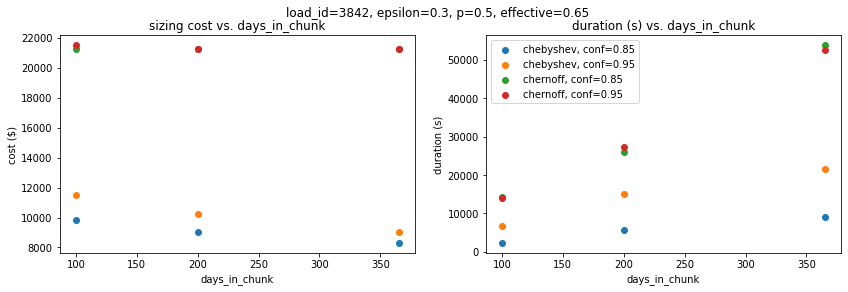

In [4]:
plot_by_daysinchunk(df_exp_100)

0.1 0.9 0.19
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


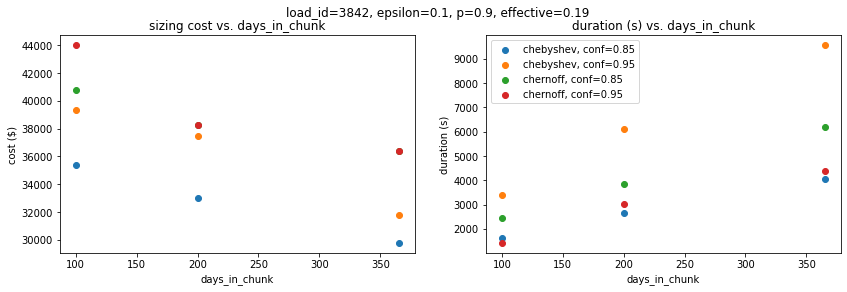

0.1 0.8 0.28
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


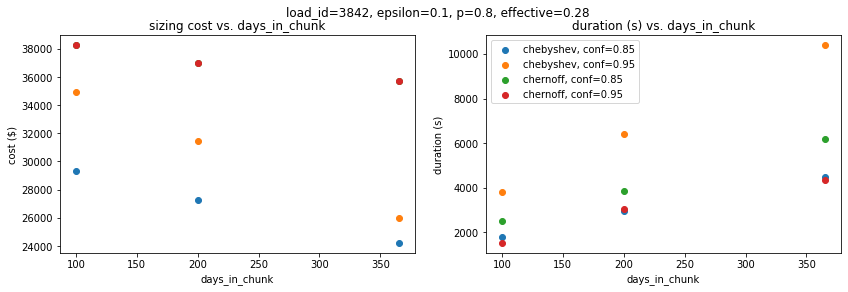

0.3 0.9 0.37
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


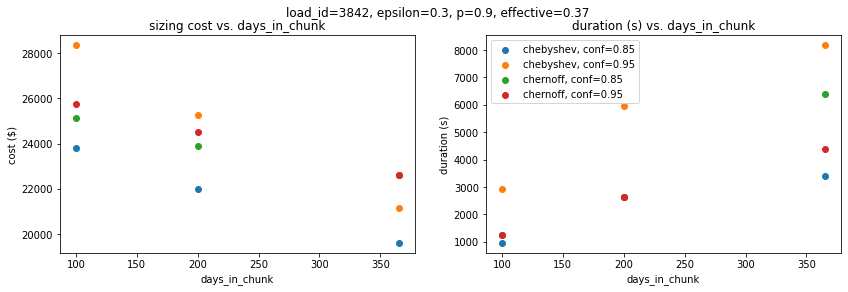

0.3 0.8 0.44
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


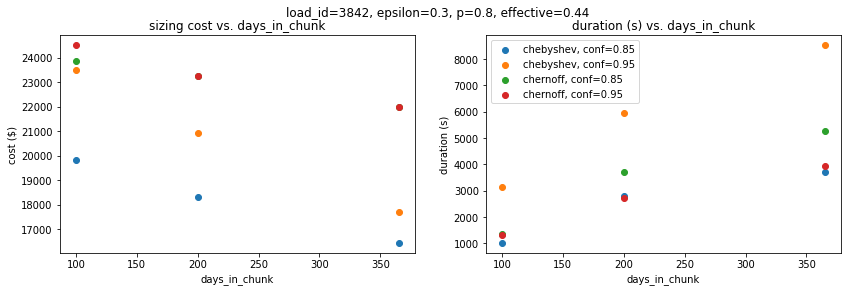

0.1 0.5 0.55
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


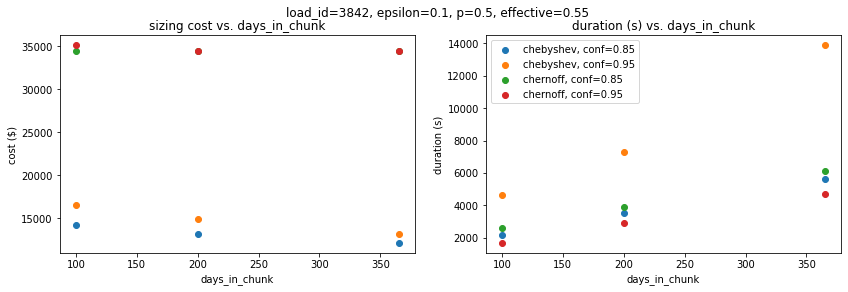

0.3 0.5 0.65
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


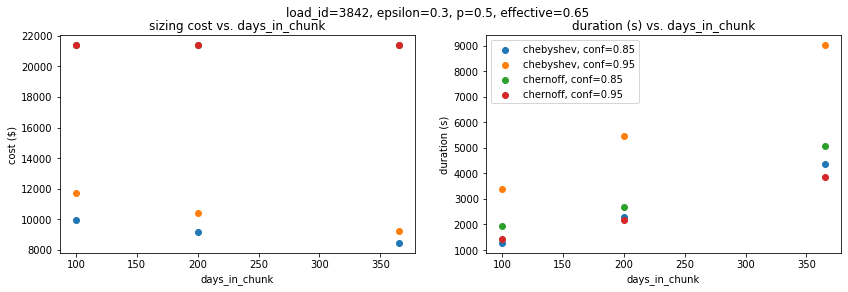

In [5]:
plot_by_daysinchunk(df_exp_40)

## Plots by p

In [6]:
def plot_by_p(df):
    for (epsilon, days_in_chunk), df_split in df.groupby(['epsilon', 'days_in_chunk']):
        print(epsilon, days_in_chunk)

        fig, (ax_cost, ax_simcalled) = plt.subplots(1, 2, figsize=(14, 4))
        fig.suptitle(f'load_id={3842}, epsilon={epsilon}, days_in_chunk={days_in_chunk}')

        ax_cost.set_title('sizing cost vs. p')
        ax_cost.set_ylabel('cost ($)')
        ax_cost.set_xlabel('p')

        ax_simcalled.set_title('duration (s) vs. p')
        ax_simcalled.set_ylabel('duration (s)')
        ax_simcalled.set_xlabel('p')

        lgds = []
        for idx, ((sim_type, conf), df_conf) in enumerate(df_split.groupby(['sim_type', 'confidence'])):
            print(sim_type, conf, len(df_conf))
            ax_cost.scatter(df_conf['p'], df_conf['cost'])
            ax_simcalled.scatter(df_conf['p'], df_conf['duration'])
            lgds.append(f'{sim_type}, conf={conf}')

        plt.legend(lgds)
        plt.show()

0.1 100
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


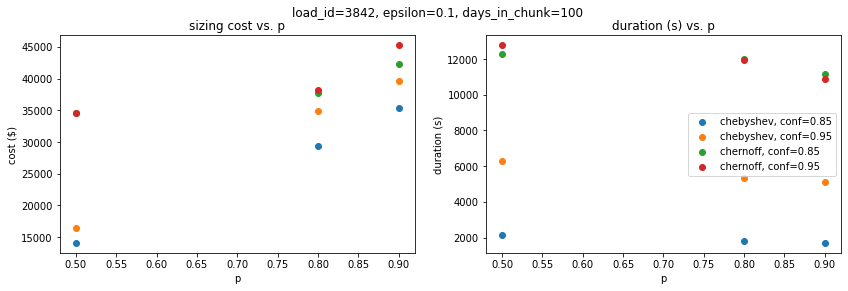

0.1 200
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


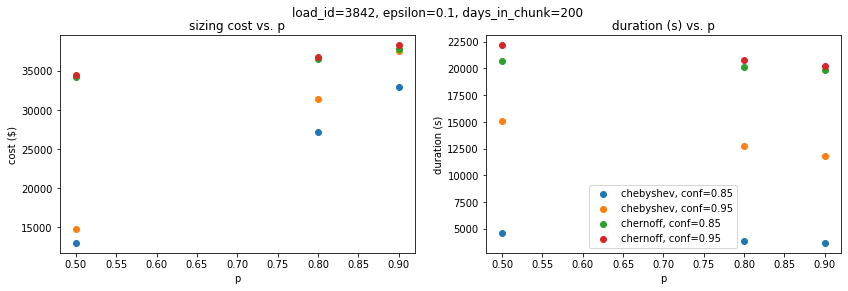

0.1 365
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


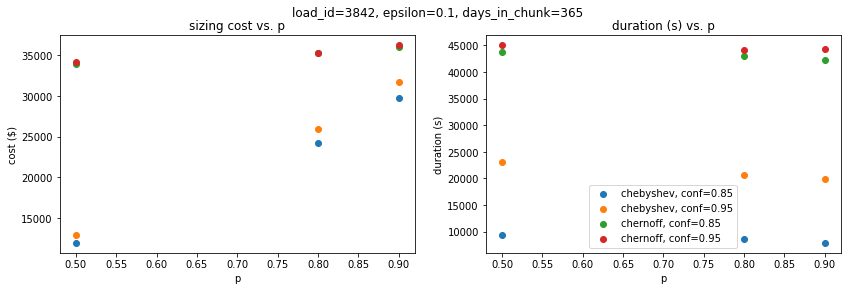

0.3 100
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


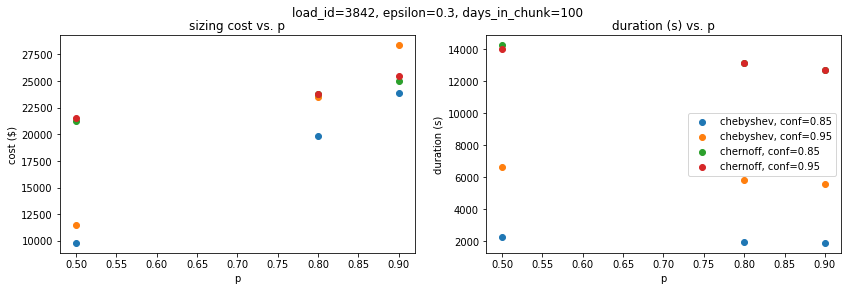

0.3 200
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


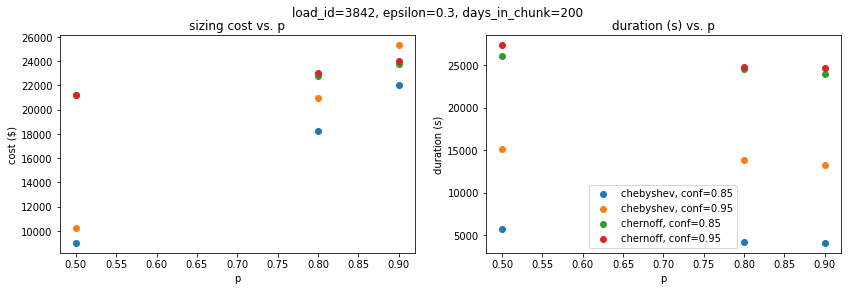

0.3 365
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


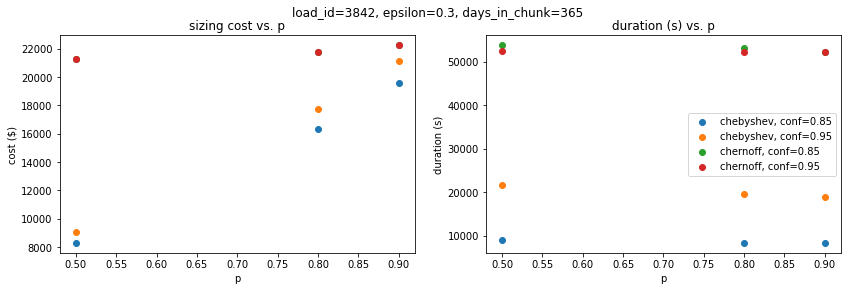

In [7]:
plot_by_p(df_exp_100)

0.1 100
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


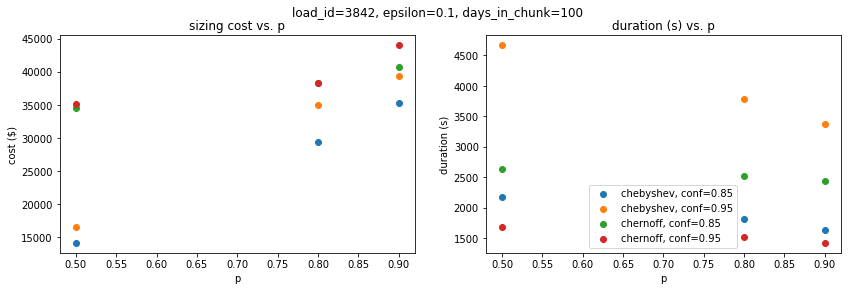

0.1 200
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


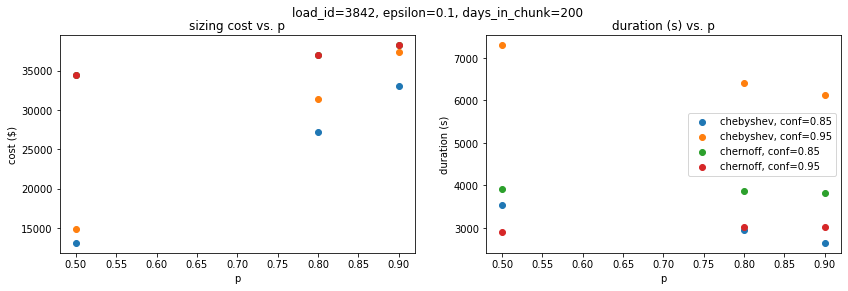

0.1 365
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


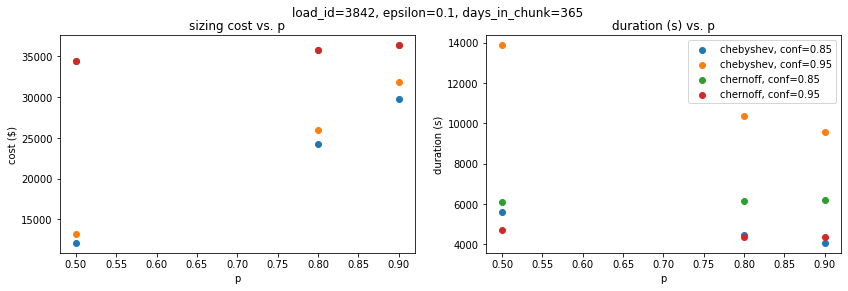

0.3 100
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


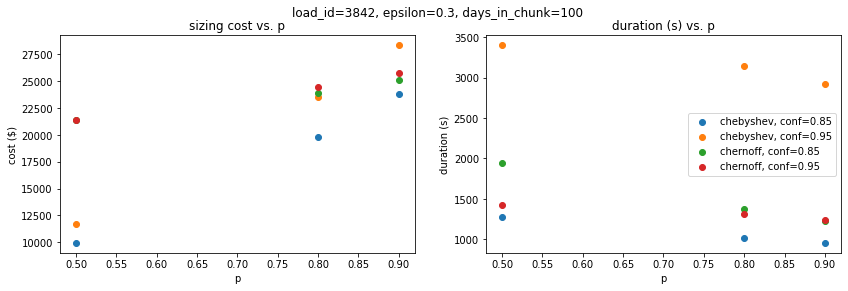

0.3 200
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


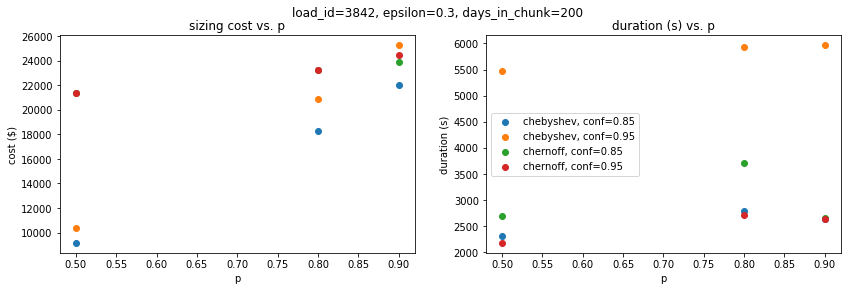

0.3 365
chebyshev 0.85 3
chebyshev 0.95 3
chernoff 0.85 3
chernoff 0.95 3


In [8]:
plot_by_p(df_exp_40)

## Combined NumSteps

In [41]:
df_exp_comb = pd.concat([df_exp_100, df_exp_40, df_exp_20], keys=[100, 40, 20])
df_exp_comb.rename_axis(['num_steps', None], inplace=True)
df_exp_comb.reset_index(level=0, inplace=True)

0.1 0.9 0.19
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


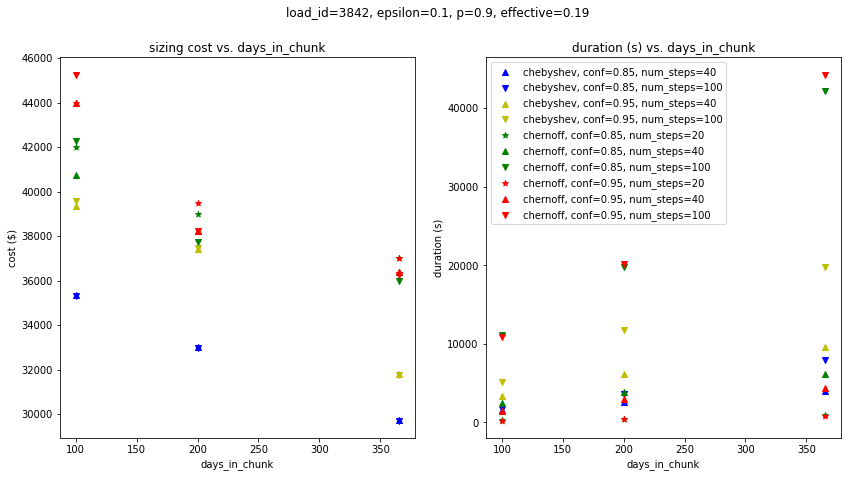

0.1 0.8 0.28
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


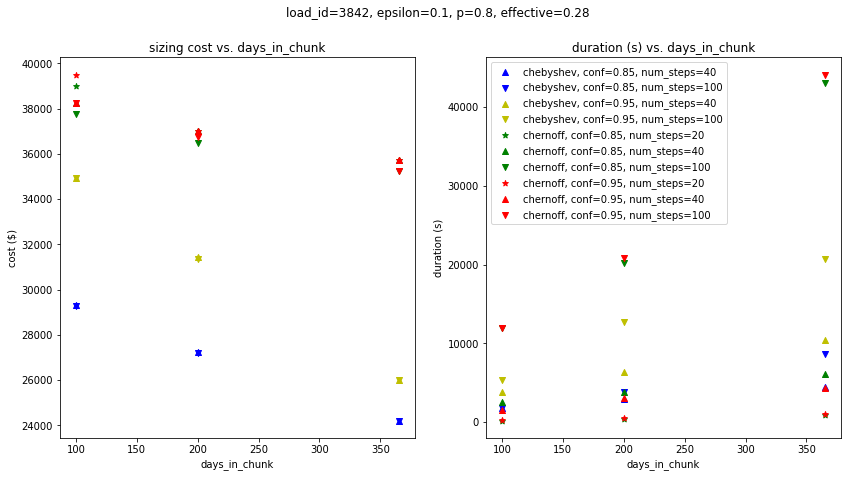

0.3 0.9 0.37
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


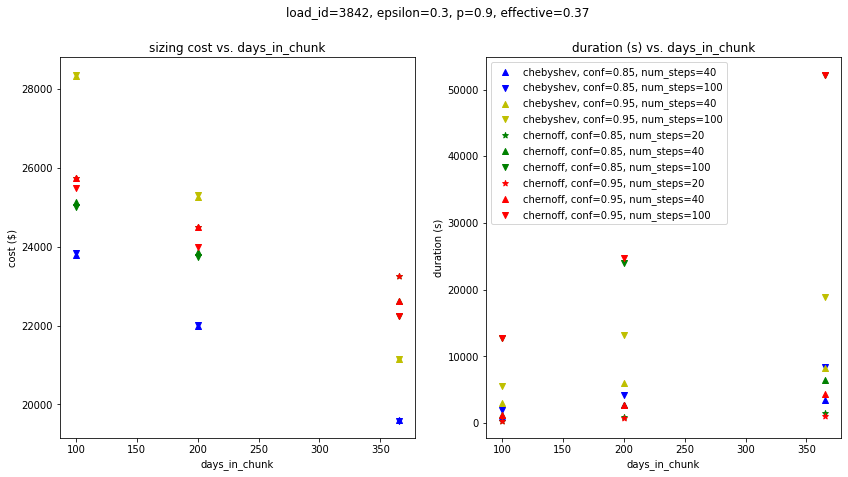

0.3 0.8 0.44
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


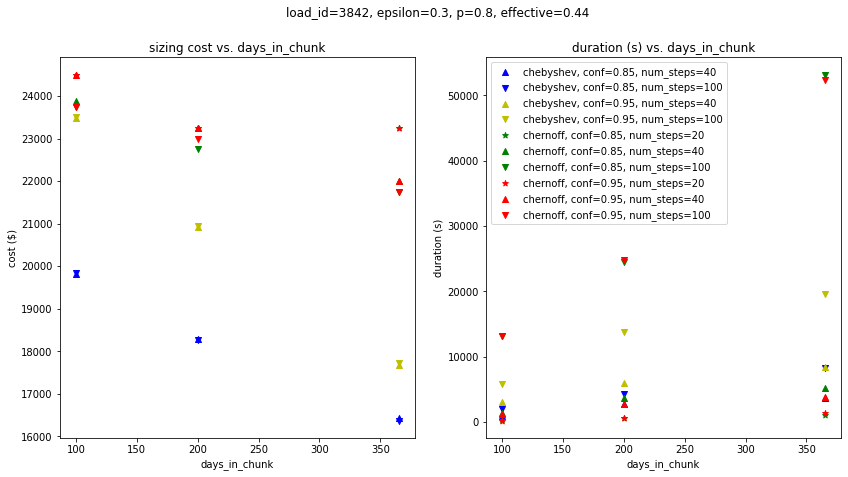

0.1 0.5 0.55
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


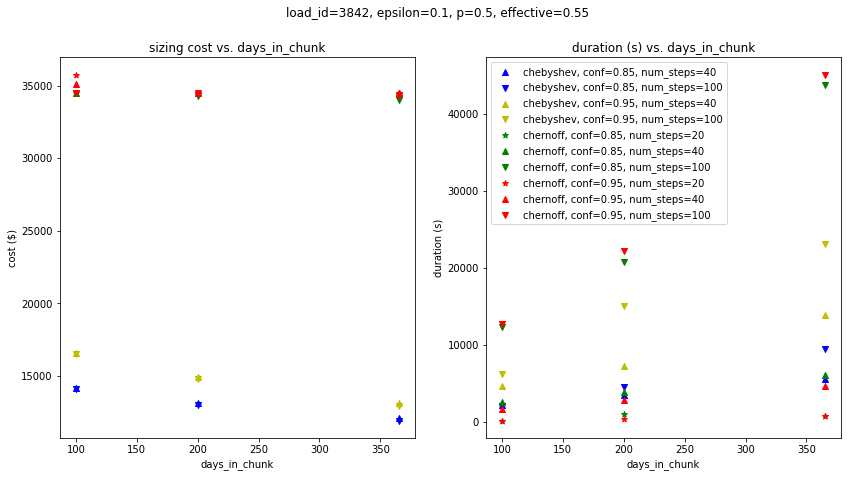

0.3 0.5 0.65
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


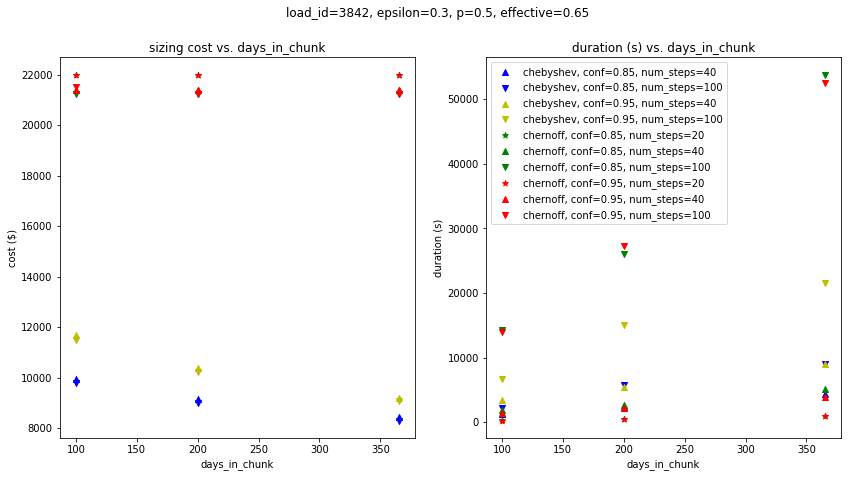

In [42]:
for (effective_epsilon, p), df_split in df_exp_comb.groupby(['effective_epsilon', 'p']):
    epsilon = df_split.iloc[-1]['epsilon']
    print(epsilon, p, effective_epsilon)

    fig, (ax_cost, ax_simcalled) = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle(f'load_id={3842}, epsilon={epsilon}, p={p}, effective={effective_epsilon}')

    ax_cost.set_title('sizing cost vs. days_in_chunk')
    ax_cost.set_ylabel('cost ($)')
    ax_cost.set_xlabel('days_in_chunk')

    ax_simcalled.set_title('duration (s) vs. days_in_chunk')
    ax_simcalled.set_ylabel('duration (s)')
    ax_simcalled.set_xlabel('days_in_chunk')

    lgds = []
    colors = ['b', 'y', 'g', 'r']
    markers = {100: 'v', 40: '^', 20: '*'}
    for idx, ((sim_type, conf), df_conf) in enumerate(df_split.groupby(['sim_type', 'confidence'])):       
        for (num_steps), df_steps in df_conf.groupby(['num_steps']):
            print(sim_type, conf, num_steps, len(df_steps))
            ax_cost.scatter(df_steps['days_in_chunk'], df_steps['cost'], c=colors[idx], marker=markers[num_steps])
            ax_simcalled.scatter(df_steps['days_in_chunk'], df_steps['duration'], c=colors[idx], marker=markers[num_steps])
            lgds.append(f'{sim_type}, conf={conf}, num_steps={num_steps}')
        
    plt.legend(lgds)
    plt.show()

0.1 100
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


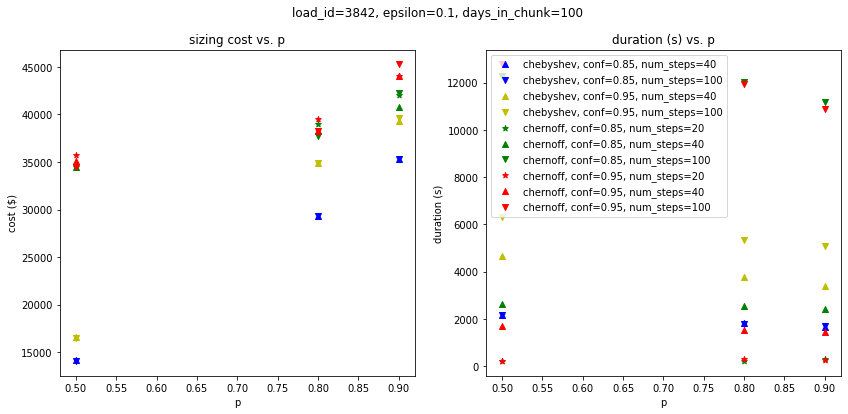

0.1 200
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


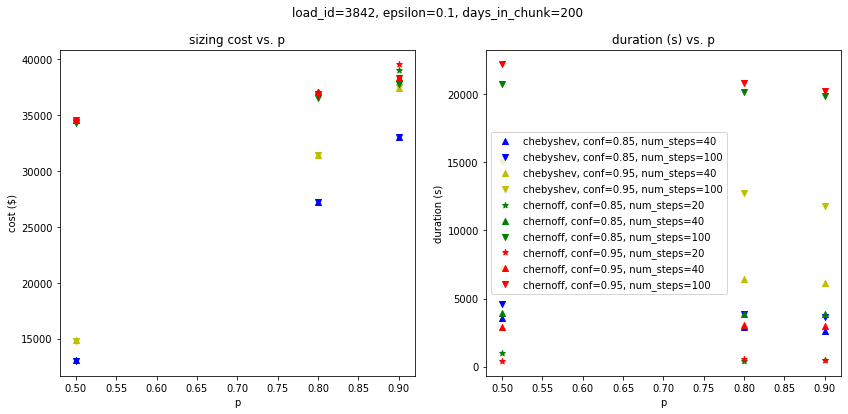

0.1 365
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


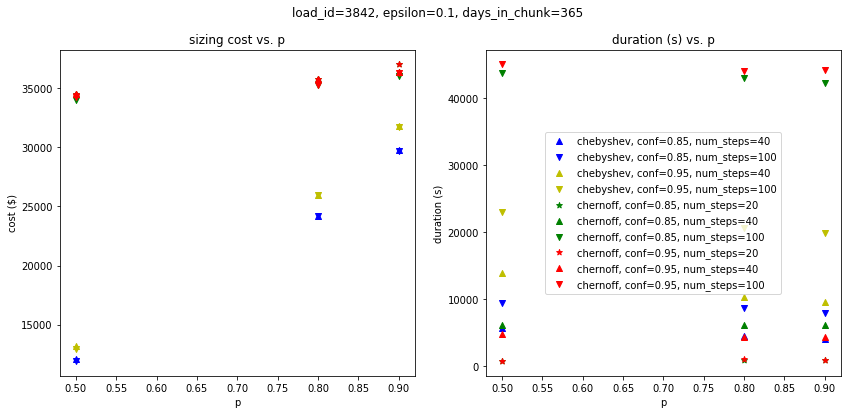

0.3 100
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


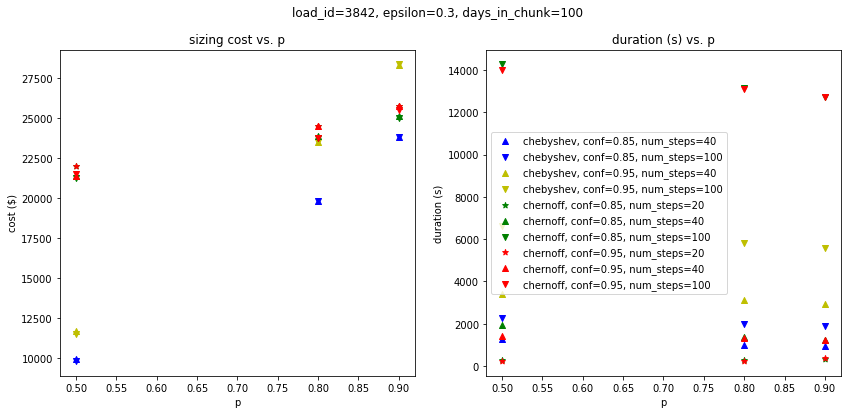

0.3 200
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


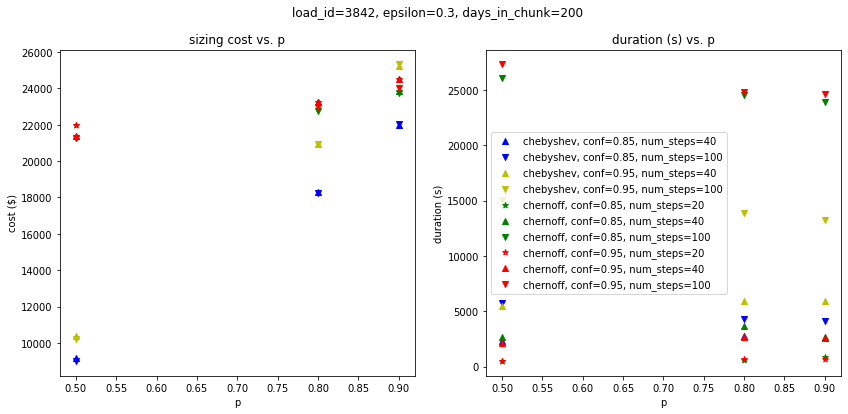

0.3 365
chebyshev 0.85 40 3
chebyshev 0.85 100 3
chebyshev 0.95 40 3
chebyshev 0.95 100 3
chernoff 0.85 20 3
chernoff 0.85 40 3
chernoff 0.85 100 3
chernoff 0.95 20 3
chernoff 0.95 40 3
chernoff 0.95 100 3


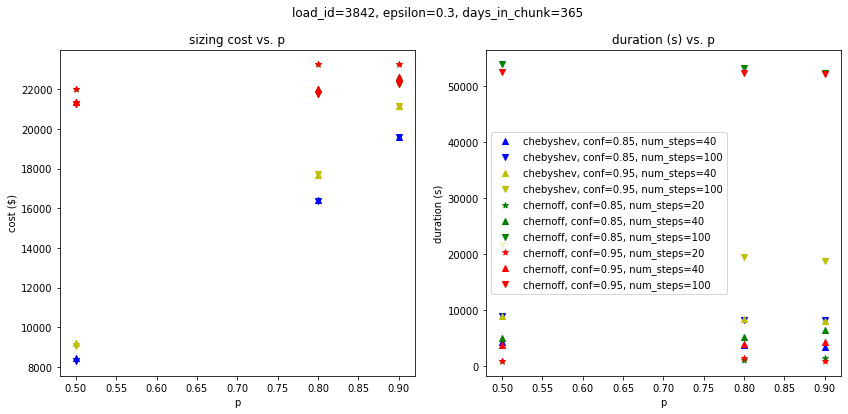

In [43]:
for (epsilon, days_in_chunk), df_split in df_exp_comb.groupby(['epsilon', 'days_in_chunk']):
    print(epsilon, days_in_chunk)

    fig, (ax_cost, ax_simcalled) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'load_id={3842}, epsilon={epsilon}, days_in_chunk={days_in_chunk}')

    ax_cost.set_title('sizing cost vs. p')
    ax_cost.set_ylabel('cost ($)')
    ax_cost.set_xlabel('p')

    ax_simcalled.set_title('duration (s) vs. p')
    ax_simcalled.set_ylabel('duration (s)')
    ax_simcalled.set_xlabel('p')
    
    lgds = []
    colors = ['b', 'y', 'g', 'r']
    markers = {100: 'v', 40: '^', 20: '*'}
    for idx, ((sim_type, conf), df_conf) in enumerate(df_split.groupby(['sim_type', 'confidence'])):       
        for (num_steps), df_steps in df_conf.groupby(['num_steps']):
            print(sim_type, conf, num_steps, len(df_steps))
            ax_cost.scatter(df_steps['p'], df_steps['cost'], c=colors[idx], marker=markers[num_steps])
            ax_simcalled.scatter(df_steps['p'], df_steps['duration'], c=colors[idx], marker=markers[num_steps])
            lgds.append(f'{sim_type}, conf={conf}, num_steps={num_steps}')
    
    plt.legend(lgds)
    plt.show()

## Compare different p

0.1 365
chebyshev 0.95 5
chernoff 0.95 5


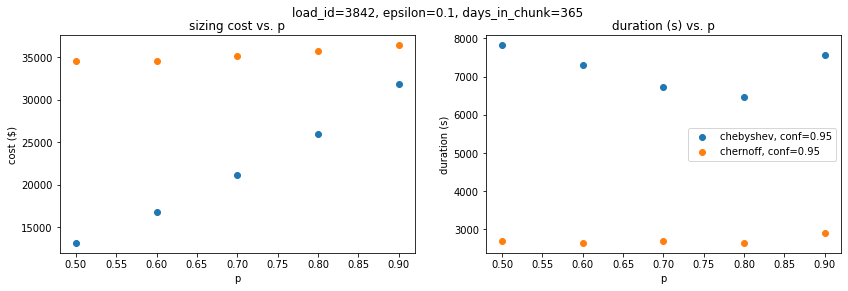

In [12]:
plot_by_p(df_exp_cmp)